<a href="https://colab.research.google.com/github/baumanbertti/Workflow_UFRGS/blob/main/Estudo_Celulas_de_cancer_B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Análise do Dataset de células de câncer de mama (Breast Cancer Wisconsin)


#Informações do Dataset

As amostras chegam periodicamente enquanto o Dr. Wolberg documentava seus casos clínicos. A base de dados reflete, portanto, este agrupamento cronológico dos dados. Essas informações de agrupamento aparecem logo abaixo, tendo sido retiradas dos próprios dados:

*   Grupo 1: 367 samples (janeiro de 1989)
*   Grupo 2: 70 samples (outubro de 1989)
*   Grupo 3: 31 samples (fevereiro de 1990)
*   Grupo 4: 17 samples (abril de 1990)
*   Grupo 5: 48 samples (agosto de 1990)
*   Grupo 6: 49 samples (atualizado em janeiro de 1991)
*   Grupo 7: 31 samples (junho de 1991)
*   Grupo 8: 86 samples (novembro de 1991)


Total: 699 pontos (a partir da base de dados doada em 15 de julho de 1992)
-----------------------------------------


Informações adicionais sobre a base de dados:

1. Sample code number:            id number
2. Clump Thickness:               1 - 10
3. Uniformity of Cell Size:       1 - 10
4. Uniformity of Cell Shape:      1 - 10
5. Marginal Adhesion:             1 - 10
6. Single Epithelial Cell Size:   1 - 10
7. Bare Nuclei:                   1 - 10
8. Bland Chromatin:               1 - 10
9. Normal Nucleoli:               1 - 10
10. Mitoses:                       1 - 10
11. Class:                        (2 for benign, 4 for malignant)

Class Labels

2 = benign, 4 = malignant

-------------------------------------------------------------------------------------------------

#Ideia central do projeto

A ideia central deste projeto foi explorar e comparar a eficácia de diferentes algoritmos de aprendizado de máquina, incluindo RandomForestClassifier, SVC, LogisticRegression e CatBoost Classifier, na identificação de câncer de mama benigno e maligno. Para tal, foi conduzida uma competição entre esses algoritmos utilizando o método de nested cross-validation. O foco principal foi analisar variáveis clínicas presentes na base de dados, buscando compreender suas relações e influências no processo de diagnóstico.
Por meio da aplicação de nested cross-validation, uma abordagem confiável e validada, foi possível avaliar o desempenho dos algoritmos de maneira robusta e obter insights sobre suas capacidades diagnósticas.

O projeto representa uma iniciativa colaborativa para aprimorar a detecção precoce do câncer de mama, utilizando a base de dados como um recurso vital para aprofundar os estudos e explorar o potencial dessas ferramentas na área da saúde.
Todos os resultados obtidos, assim como as lições aprendidas ao longo desse processo, foram documentados e compartilhados publicamente. O intuito é contribuir para o avanço da pesquisa nesse campo e estimular futuras investigações utilizando abordagens semelhantes.

-------

Tipos de problemas

*   Features com falta de dados
*   Problema de classificação (?)

Data source:

*   https://archive.ics.uci.edu/dataset/15/breast+cancer+wisconsin+original





##Fonte de dados tratada

#Bibliotecas

In [1]:
import time
from itertools import product
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import missingno as msno

from sklearn.preprocessing import StandardScaler

link_pdp_tool = 'https://raw.githubusercontent.com/attilalr/pdp-tool/main/pdp_tool.py'

try:
    from pdp_tool import pdp
except:
    !wget -d {link_pdp_tool}
    from pdp_tool import pdp

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.model_selection import StratifiedKFold

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

#scores
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

try:
    from catboost import CatBoostClassifier
except:
    !pip3 install catboost
    from catboost import CatBoostClassifier


#Dataset e tratamento de dados

In [2]:
file_ = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data' #Dataset

In [3]:
column_names = ['Sample code number',
                'Clump Thickness',
                'Uniformity of Cell Size',
                'Uniformity of Cell Shape',
                'Marginal Adhesion',
                'Single Epithelial Cell Size',
                'Bare Nuclei',
                'Bland Chromatin',
                'Normal Nucleoli',
                'Mitoses',
                'Class',
]


In [4]:
df = pd.read_csv(file_, header=None, names=column_names)

In [5]:
df['Class_bin'] = (df['Class'] == 4).values.astype('int') #modificando 4 (maligno) e 2(benigno) em binario
df

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class,Class_bin
0,1000025,5,1,1,1,2,1,3,1,1,2,0
1,1002945,5,4,4,5,7,10,3,2,1,2,0
2,1015425,3,1,1,1,2,2,3,1,1,2,0
3,1016277,6,8,8,1,3,4,3,7,1,2,0
4,1017023,4,1,1,3,2,1,3,1,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2,0
695,841769,2,1,1,1,2,1,1,1,1,2,0
696,888820,5,10,10,3,7,3,8,10,2,4,1
697,897471,4,8,6,4,3,4,10,6,1,4,1


In [6]:
df.replace('?', np.nan, inplace =True) #Trocando as features que não fornecem informações corretas por NaNs
df

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class,Class_bin
0,1000025,5,1,1,1,2,1,3,1,1,2,0
1,1002945,5,4,4,5,7,10,3,2,1,2,0
2,1015425,3,1,1,1,2,2,3,1,1,2,0
3,1016277,6,8,8,1,3,4,3,7,1,2,0
4,1017023,4,1,1,3,2,1,3,1,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2,0
695,841769,2,1,1,1,2,1,1,1,1,2,0
696,888820,5,10,10,3,7,3,8,10,2,4,1
697,897471,4,8,6,4,3,4,10,6,1,4,1


<Axes: >

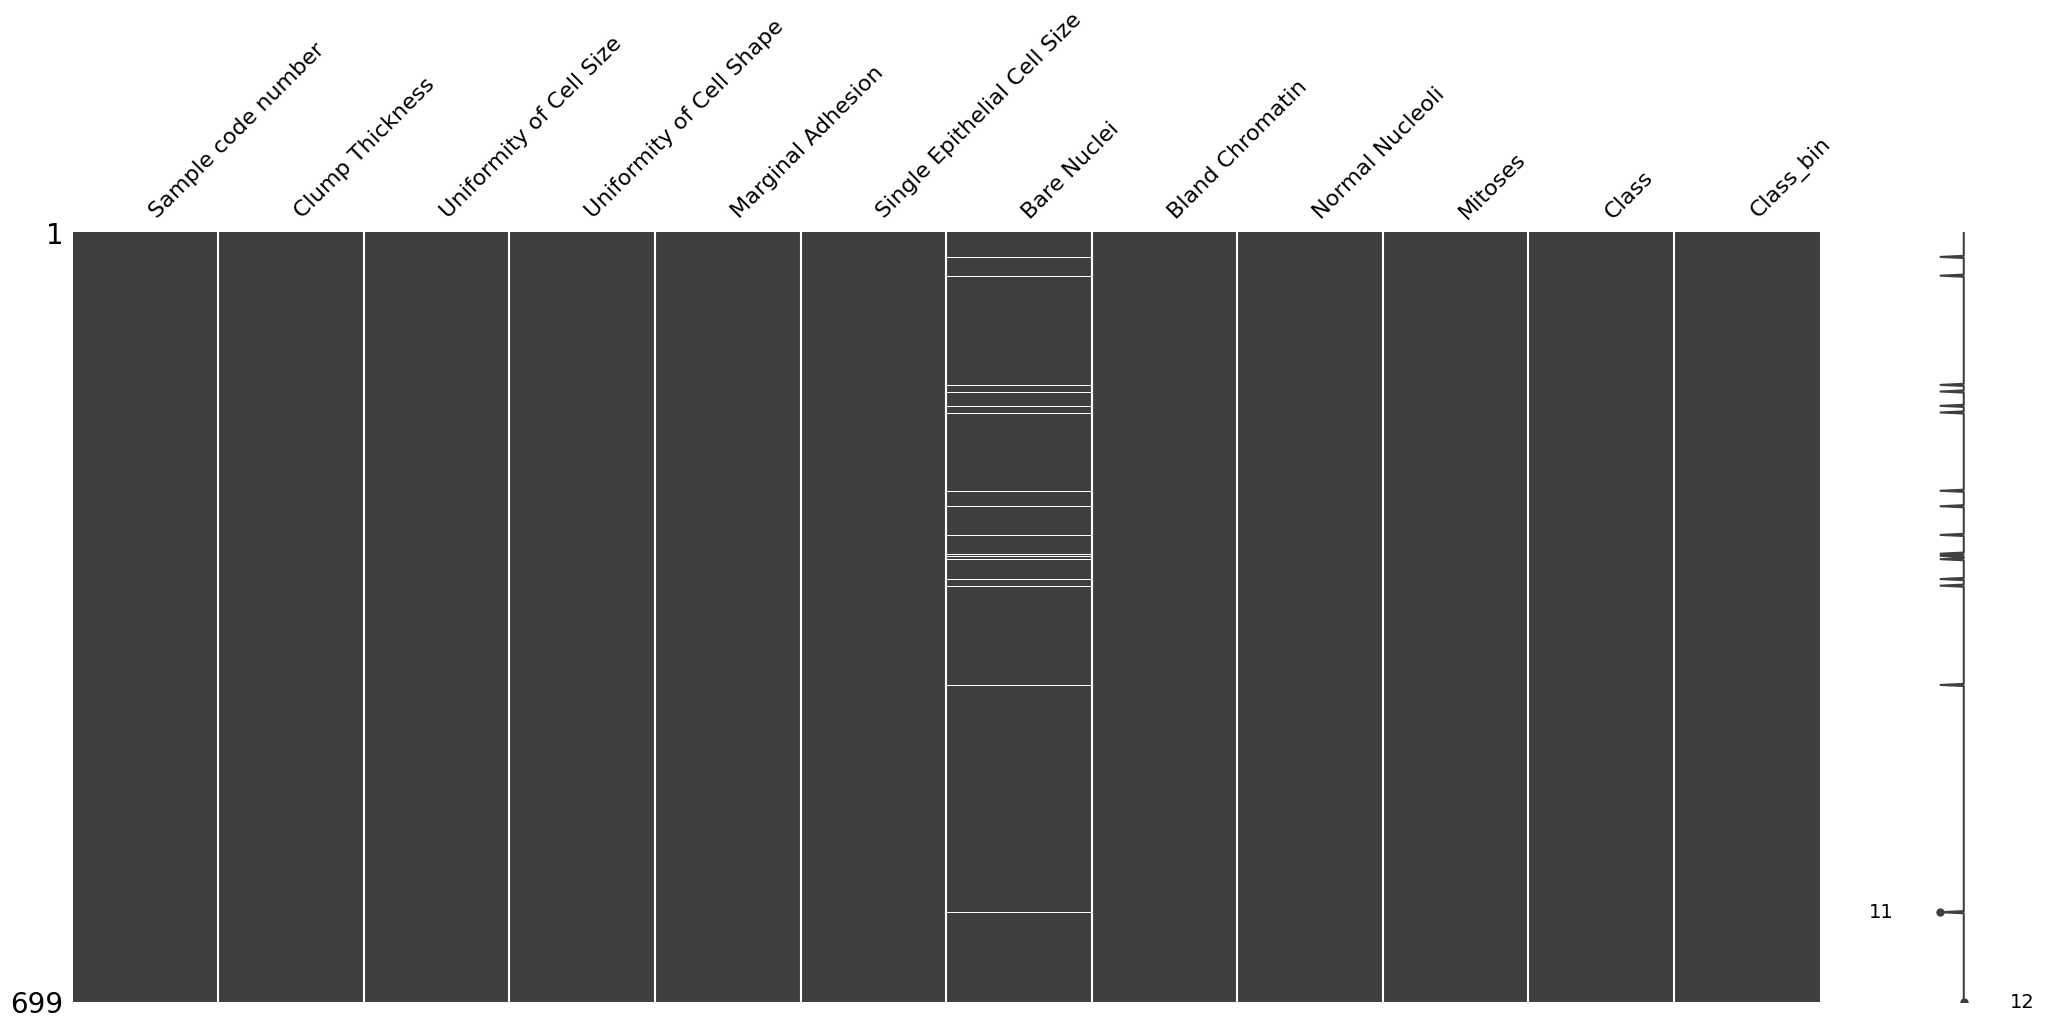

In [7]:
msno.matrix(df) #Plot dos NaNs

Sample code number              0
Clump Thickness                 0
Uniformity of Cell Size         0
Uniformity of Cell Shape        0
Marginal Adhesion               0
Single Epithelial Cell Size     0
Bare Nuclei                    16
Bland Chromatin                 0
Normal Nucleoli                 0
Mitoses                         0
Class                           0
Class_bin                       0
dtype: int64


Text(0, 0.5, 'número de nans por feature')

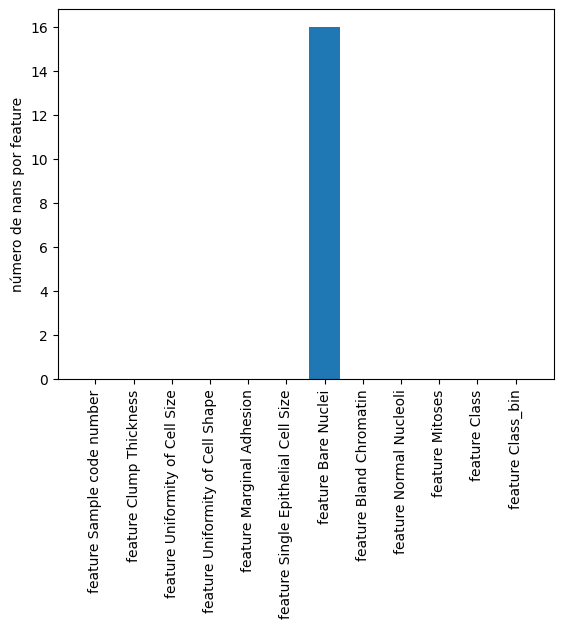

In [8]:
# Soma de nans em cada coluna

print (df.isna().sum(axis=0))

list_columns = list(df.columns)

plt.bar(range(len(list_columns)), df.isna().sum(axis=0), width=0.8)
plt.xticks(range(len(list_columns)), ['feature '+str(x) for x in list_columns], rotation=90)
plt.xlabel('')
plt.ylabel('número de nans por feature')

Neste caso, foram removidas as linhas com os NaNs. É importante verificar se a remoção afetará significativamente a quantidade de features ou se a sua permanência afetará erroneamente as conclusões da análise.

In [9]:
df=df.dropna()
df

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class,Class_bin
0,1000025,5,1,1,1,2,1,3,1,1,2,0
1,1002945,5,4,4,5,7,10,3,2,1,2,0
2,1015425,3,1,1,1,2,2,3,1,1,2,0
3,1016277,6,8,8,1,3,4,3,7,1,2,0
4,1017023,4,1,1,3,2,1,3,1,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2,0
695,841769,2,1,1,1,2,1,1,1,1,2,0
696,888820,5,10,10,3,7,3,8,10,2,4,1
697,897471,4,8,6,4,3,4,10,6,1,4,1


<Axes: >

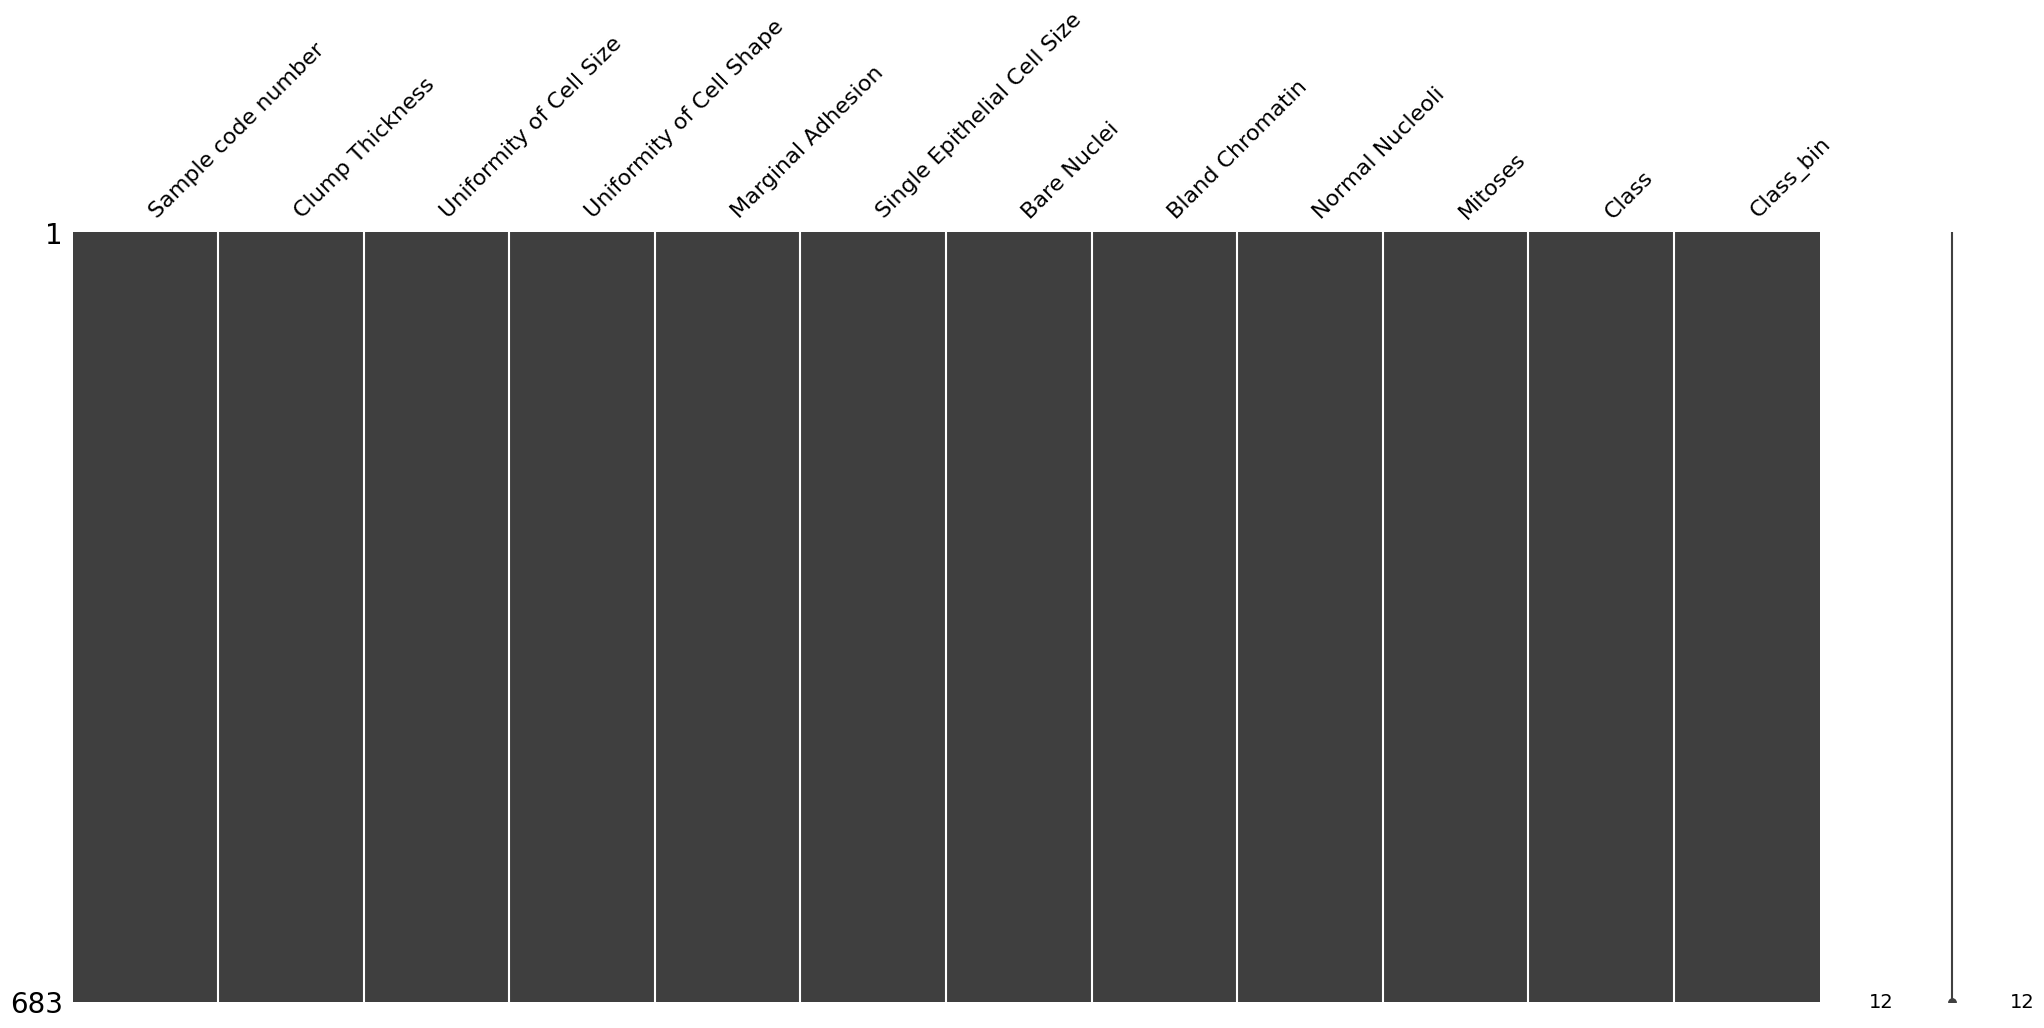

In [10]:
msno.matrix(df) #Verificação se há NaNs no dataset

In [11]:
df[column_names].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Sample code number           683 non-null    int64 
 1   Clump Thickness              683 non-null    int64 
 2   Uniformity of Cell Size      683 non-null    int64 
 3   Uniformity of Cell Shape     683 non-null    int64 
 4   Marginal Adhesion            683 non-null    int64 
 5   Single Epithelial Cell Size  683 non-null    int64 
 6   Bare Nuclei                  683 non-null    object
 7   Bland Chromatin              683 non-null    int64 
 8   Normal Nucleoli              683 non-null    int64 
 9   Mitoses                      683 non-null    int64 
 10  Class                        683 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 64.0+ KB


In [12]:
df['Bare Nuclei'] = df['Bare Nuclei'].astype(int)

<ipython-input-12-6c159b05e544>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Bare Nuclei'] = df['Bare Nuclei'].astype(int)


In [13]:
df[column_names].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Sample code number           683 non-null    int64
 1   Clump Thickness              683 non-null    int64
 2   Uniformity of Cell Size      683 non-null    int64
 3   Uniformity of Cell Shape     683 non-null    int64
 4   Marginal Adhesion            683 non-null    int64
 5   Single Epithelial Cell Size  683 non-null    int64
 6   Bare Nuclei                  683 non-null    int64
 7   Bland Chromatin              683 non-null    int64
 8   Normal Nucleoli              683 non-null    int64
 9   Mitoses                      683 non-null    int64
 10  Class                        683 non-null    int64
dtypes: int64(11)
memory usage: 64.0 KB


In [14]:
df_ = df.copy()
df_

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class,Class_bin
0,1000025,5,1,1,1,2,1,3,1,1,2,0
1,1002945,5,4,4,5,7,10,3,2,1,2,0
2,1015425,3,1,1,1,2,2,3,1,1,2,0
3,1016277,6,8,8,1,3,4,3,7,1,2,0
4,1017023,4,1,1,3,2,1,3,1,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2,0
695,841769,2,1,1,1,2,1,1,1,1,2,0
696,888820,5,10,10,3,7,3,8,10,2,4,1
697,897471,4,8,6,4,3,4,10,6,1,4,1


In [15]:
df_.drop(['Sample code number', 'Class'], axis=1,inplace=True) #Retirada das colunas menos relevantes

In [16]:
df_bin=df_["Class_bin"].value_counts().reset_index() #quantidade gerais de canceres benignos e malignos
df_bin.columns=["Presence_of_cancer", "Total"]

<Axes: xlabel='Presence_of_cancer', ylabel='Total'>

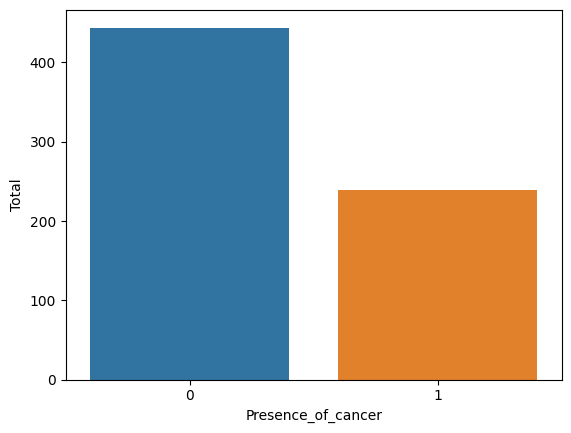

In [17]:
sns.barplot( data=df_bin, x="Presence_of_cancer", y="Total")

### Correlação

In [18]:
df_.corr()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class_bin
Clump Thickness,1.000000,0.642481,0.653470,0.487829,0.523596,0.593091,0.553742,0.534066,0.350957,0.714790
Uniformity of Cell Size,0.642481,1.000000,0.907228,0.706977,0.753544,0.691709,0.755559,0.719346,0.460755,0.820801
Uniformity of Cell Shape,0.653470,0.907228,1.000000,0.685948,0.722462,0.713878,0.735344,0.717963,0.441258,0.821891
Marginal Adhesion,0.487829,0.706977,0.685948,1.000000,0.594548,0.670648,0.668567,0.603121,0.418898,0.706294
Single Epithelial Cell Size,0.523596,0.753544,0.722462,0.594548,1.000000,0.585716,0.618128,0.628926,0.480583,0.690958
Bare Nuclei,0.593091,0.691709,0.713878,0.670648,0.585716,1.000000,0.680615,0.584280,0.339210,0.822696
Bland Chromatin,0.553742,0.755559,0.735344,0.668567,0.618128,0.680615,1.000000,0.665602,0.346011,0.758228
Normal Nucleoli,0.534066,0.719346,0.717963,0.603121,0.628926,0.584280,0.665602,1.000000,0.433757,0.718677
Mitoses,0.350957,0.460755,0.441258,0.418898,0.480583,0.339210,0.346011,0.433757,1.000000,0.423448
Class_bin,0.714790,0.820801,0.821891,0.706294,0.690958,0.822696,0.758228,0.718677,0.423448,1.000000


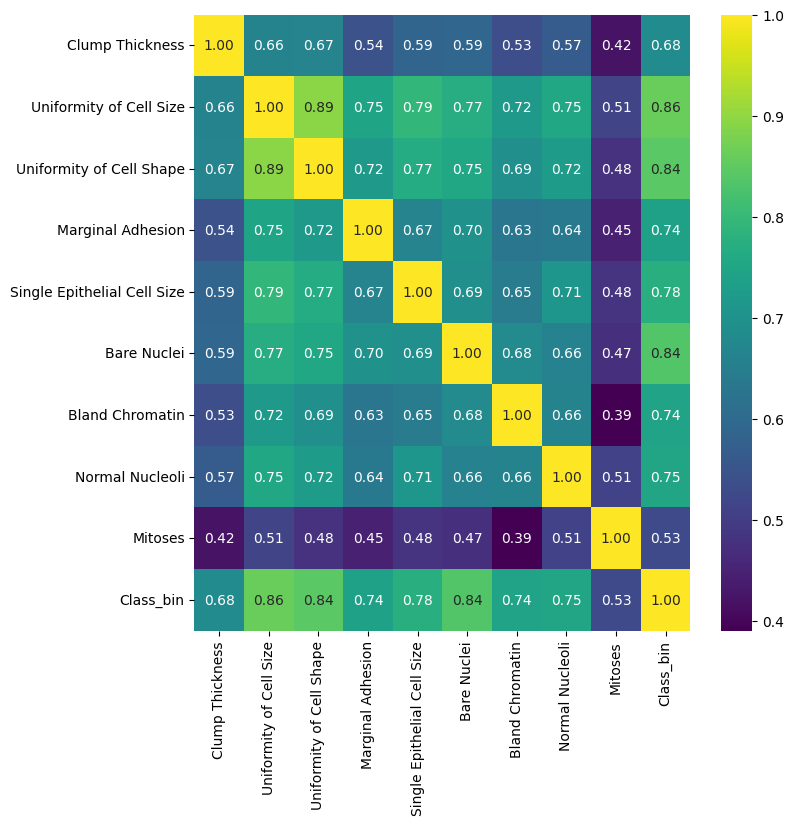

In [19]:
fig, (ax1) = plt.subplots(1, figsize=(8,8))
sns.heatmap(df_.corr(method='spearman'), annot=True, fmt='.2f', cmap="viridis", linecolor="#222", ax=ax1)
plt.show()

In [20]:
# Limite de correlação absoluta
limit_corr = 0.7

# Correlações com Class_bin
corr_ = df_.corr()['Class_bin'].abs().drop('Class_bin')
feature_corr = corr_[corr_ > limit_corr]
n_feature = feature_corr.index.tolist()
print("Variáveis com correlação absoluta acima de", limit_corr, "em relação a Class_bin:")
print(n_feature)

Variáveis com correlação absoluta acima de 0.7 em relação a Class_bin:
['Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Marginal Adhesion', 'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli']


###Partial Dependence Plot

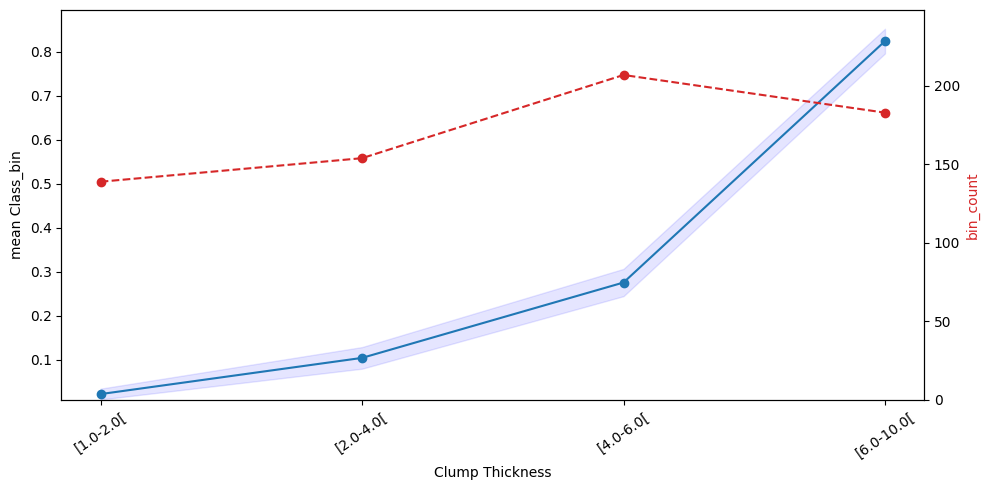

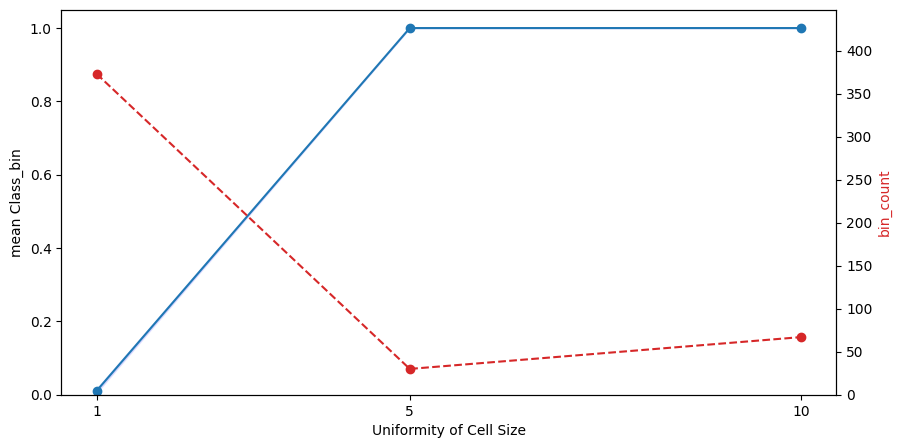

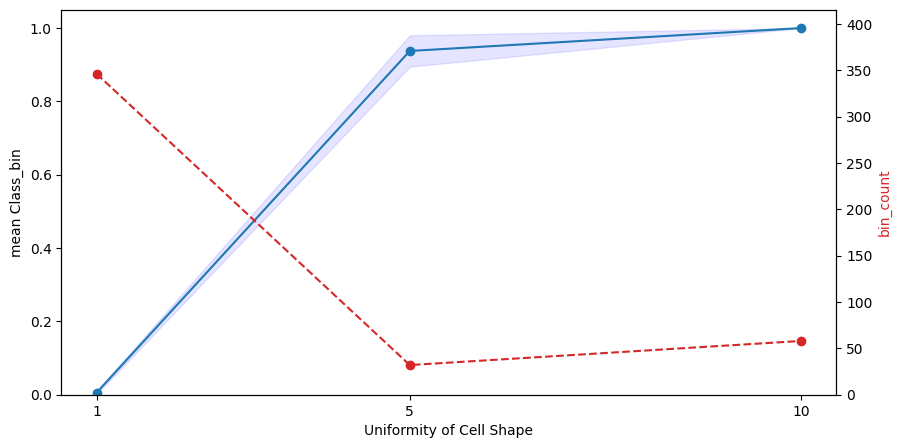

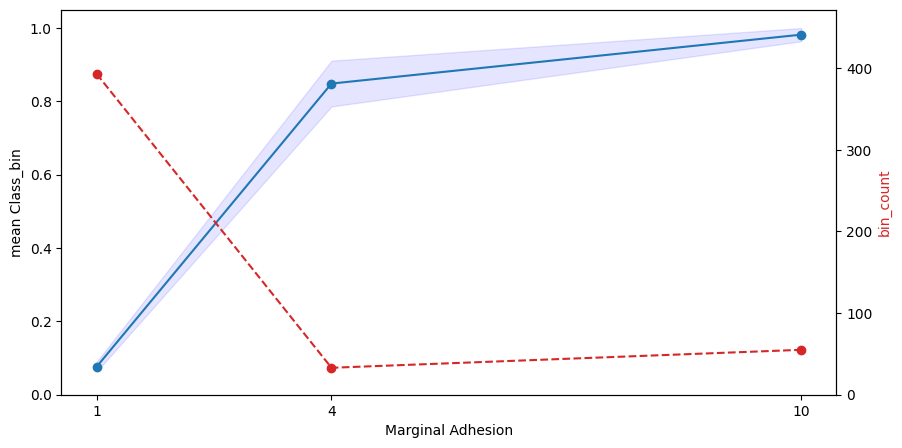

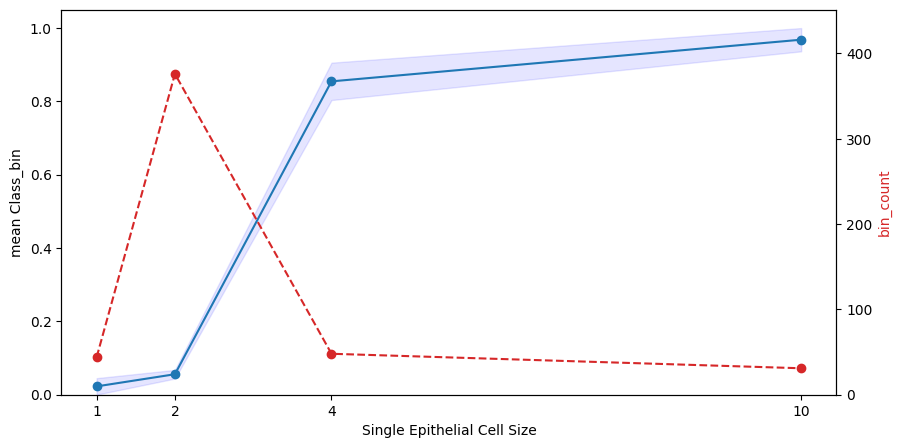

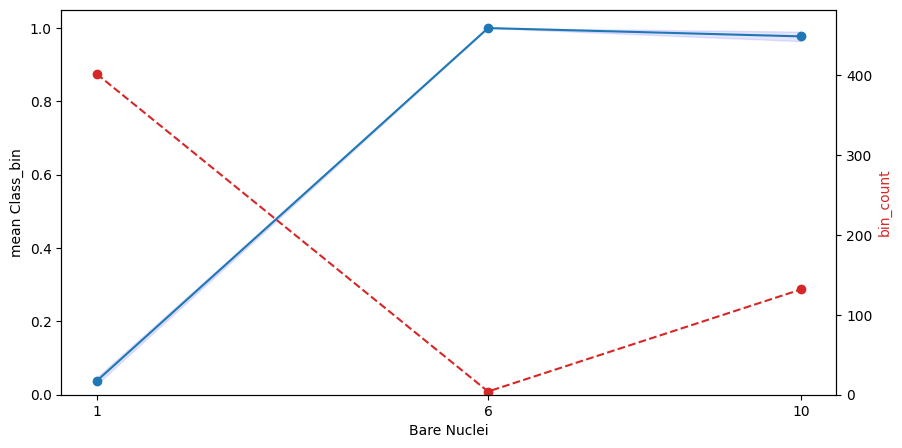

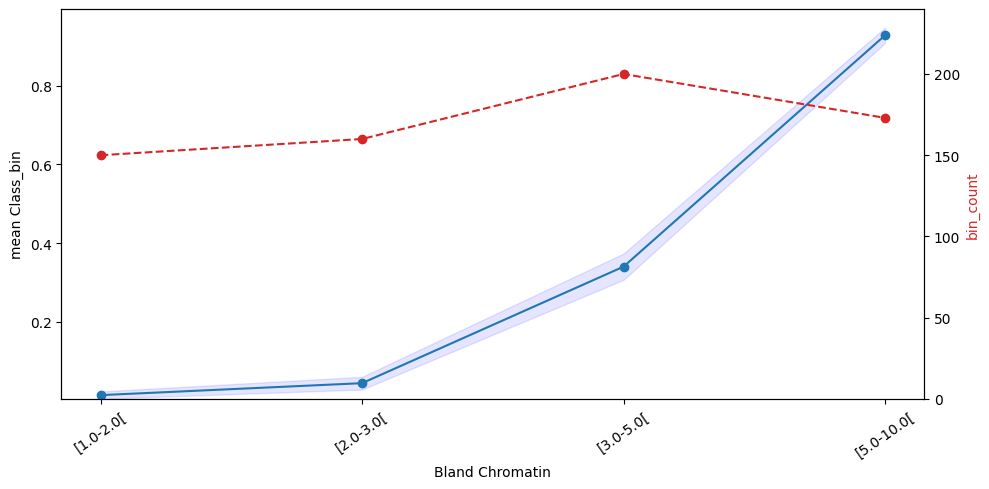

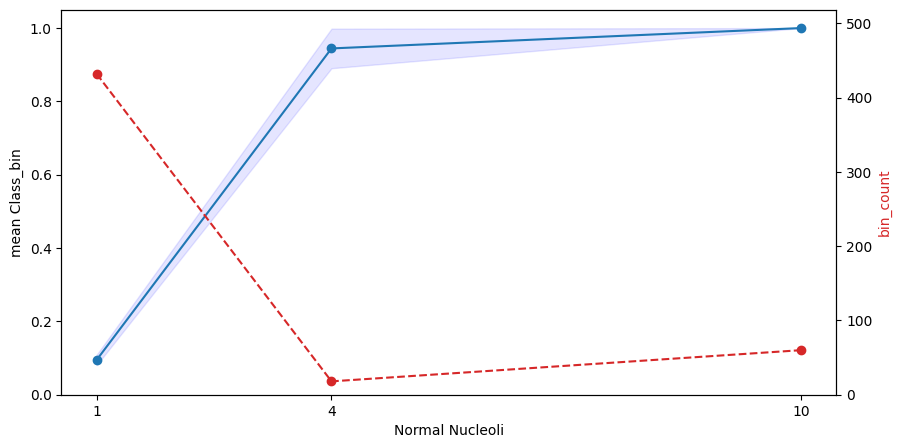

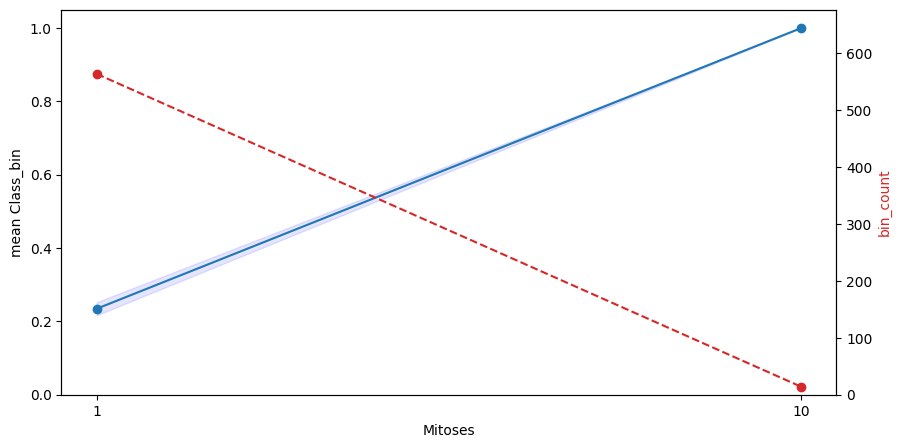

In [21]:
pdp(df_,
    df_.columns,
    'Class_bin',
    n=4, #aumenta a quantidade de faixas verticais que serão analisadas. Integra menos pontos para achar a média
    writefolder=None,
    digits=1,
    figsize=(10, 5),
    showbincount=True,
    ylim_origin=True,
    )

### Validação e Treinamento

In [22]:
# Random seed
seed = int(1*time.time())
rng = np.random.RandomState(seed)

In [23]:
X = df_.drop(['Class_bin'], axis = 1)
y = df_['Class_bin']

In [24]:
# Dividir entre treino e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=rng)

In [25]:
# treinar um modelo simples com os dados de treino
clf = LogisticRegression(random_state=rng).fit(X_train, y_train)

# estabelecer o y_predict
y_pred = clf.predict(X_test)
y_score = clf.predict_proba(X_test)[:, 1] # o 1 é porque estamos vendo o escore para a predição do label 1
y_true = y_test

auc_ = roc_auc_score(y_true, y_score)

print (f'AUC score: {auc_:.2f}')

AUC score: 0.99


Nested cross-validation

In [26]:
cv_outer = 3 # controla quantos 'melhores modelos' teremos
cv_inner = 5 # particoes da cross-validação interna que seleciona o melhor modelo em 1 split do cv_outer

l = list()

# registrar random forest
l.append(dict())
l[-1]['model'] = RandomForestClassifier(max_depth=2)
l[-1]['name'] = 'Random Forest Classifier max_depth=2'
l[-1]['scores'] = list()

l.append(dict())
l[-1]['model'] = RandomForestClassifier(max_depth=3)
l[-1]['name'] = 'Random Forest Classifier max_depth=3'
l[-1]['scores'] = list()

l.append(dict())
l[-1]['model'] = RandomForestClassifier(max_depth=4)
l[-1]['name'] = 'Random Forest Classifier max_depth=4'
l[-1]['scores'] = list()

l.append(dict())
l[-1]['model'] = RandomForestClassifier(max_depth=6)
l[-1]['name'] = 'Random Forest Classifier max_depth=6'
l[-1]['scores'] = list()

l.append(dict())
l[-1]['model'] = RandomForestClassifier(max_depth=8)
l[-1]['name'] = 'Random Forest Classifier max_depth=8'
l[-1]['scores'] = list()

l.append(dict())
l[-1]['model'] = RandomForestClassifier(max_depth=None)
l[-1]['name'] = 'Random Forest Classifier, max_depth=None'
l[-1]['scores'] = list()

# colocar o catboost
l.append(dict())
l[-1]['model'] = CatBoostClassifier(logging_level='Silent')
l[-1]['name'] = 'CatBoost Classifier'
l[-1]['scores'] = list()


# registrar alguns logits
n_logits = 16
C_vector_for_logit = np.linspace(0.1, 5, n_logits)

for i, C in enumerate(C_vector_for_logit):
    l.append(dict())
    l[-1]['model'] = LogisticRegression(C=C)
    l[-1]['name'] = f'Logistic Regression C={C:.2f}'
    l[-1]['scores'] = list()


# registrar SVCs
#C_vector_for_svc = np.linspace(0.1, 5, 12)
C_vector_for_svc = np.logspace(-2, 2, 20)
#gamma_vector_for_svc = np.linspace(0.1, 5, 12)
gamma_vector_for_svc = np.logspace(-2, 2, 20)


for C, gamma in product(C_vector_for_svc, gamma_vector_for_svc):
    l.append(dict())
    l[-1]['model'] = SVC(C=C, gamma=gamma,probability=True)
    l[-1]['name'] = f'SVC C={C:.2f} gamma={gamma:.2f}'
    l[-1]['scores'] = list()


print (f'Lista de modelos com tamanho final igual a {len(l)}.')


lst_best_models = list()
scaler = StandardScaler()


# esse laço outer eh novo, entrou no lugar do train_test_split
kfold_outer = StratifiedKFold(n_splits=cv_outer, shuffle=True)
for j, (train_index_outer, test_index_outer) in enumerate(kfold_outer.split(X, y)):

    print (f'Outer Fold {j+1} de um total de {cv_outer}...')

    X_ = X.iloc[train_index_outer]
    y_ = y.iloc[train_index_outer]

    X_holdout = X.iloc[test_index_outer]
    y_holdout = y.iloc[test_index_outer]



    kfold_inner = StratifiedKFold(n_splits=cv_inner, shuffle=True)
    for i, (train_index_inner, test_index_inner) in enumerate(kfold_inner.split(X_, y_)):

        X_train = X_.iloc[train_index_inner].copy() #
        y_train = y_.iloc[train_index_inner]

        X_test = X_.iloc[test_index_inner].copy()
        y_test = y_.iloc[test_index_inner]


        # como exemplo de modificação no X vamos aplicar o
        scaler.fit(X_train)
        X_train  = scaler.transform(X_train)
        X_test  = scaler.transform(X_test)


        # varrer os modelos, o principal problema dessa rotina é que ela faz tudo em série, tem que usar o multiprocessing pra rodar em paralelo
        for model in l:
            clf = model['model']

            clf.fit(X_train, y_train)

            y_true = y_test
            y_pred = clf.predict(X_test)

            acc_ = accuracy_score(y_true, y_pred)
            model['scores'].append(acc_)

            #print (f"Modelo {model['name']} teve score {acc_:.3f}")


    # aqui eu preciso pegar uma media dos scores de cada modelo, media nos folds
    lst_medias_scores = list()
    for model in l:
        media_score = np.mean(model['scores'])
        lst_medias_scores.append(media_score)
        print (f'Media score modelo {model["name"]} igual a {media_score:.3f}')



    name_best_model = l[np.argmax(lst_medias_scores)]["name"]
    id_best_model = np.argmax(lst_medias_scores)
    lst_best_models.append(l[np.argmax(lst_medias_scores)]) # guardar os melhores numa lista

    print (f'A melhor média de escore foi {np.max(lst_medias_scores):.3f} do modelo {name_best_model} no indice {id_best_model}')

    clf = l[np.argmax(lst_medias_scores)]['model']
    #

    #
    # std scaler novamente pois vou precisar aplicar no holdout
    scaler.fit(X_)
    X_scaled  = scaler.transform(X_)
    X_holdout_scaled  = scaler.transform(X_holdout)

    clf.fit(X_scaled, y_)
    y_true = y_holdout
    y_pred = clf.predict(X_holdout_scaled)

    print(f'Acurácia do modelo {name_best_model} no holdout test: {accuracy_score(y_true, y_pred):.3f}')

print ()
print ('Melhores modelos:')
for model in lst_best_models:
    print (f'{model["name"]}')

best_accuracies = []

# Iteração sobre os melhores modelos
for model_info in lst_best_models:
    model = model_info['model']
    model_name = model_info['name']

    # Lista para armazenar as acurácias para este modelo
    model_accuracies = []

    # Iteração sobre as divisões externas
    for j, (train_index_outer, test_index_outer) in enumerate(kfold_outer.split(X, y)):
        X_ = X.iloc[train_index_outer]
        y_ = y.iloc[train_index_outer]

        X_holdout = X.iloc[test_index_outer]
        y_holdout = y.iloc[test_index_outer]

        # Iteração sobre as divisões internas
        for i, (train_index_inner, test_index_inner) in enumerate(kfold_inner.split(X_, y_)):
            X_train = X_.iloc[train_index_inner].copy()
            y_train = y_.iloc[train_index_inner]

            X_test = X_.iloc[test_index_inner].copy()
            y_test = y_.iloc[test_index_inner]

            # Escalonamento
            scaler.fit(X_train)
            X_train = scaler.transform(X_train)
            X_test = scaler.transform(X_test)

            # Treinamento do modelo
            model.fit(X_train, y_train)

            # Avaliação do modelo
            y_true = y_test
            y_pred = model.predict(X_test)

            # Cálculo da acurácia e armazenamento
            acc_ = accuracy_score(y_true, y_pred)
            model_accuracies.append(acc_)

    # Acurácia média para este modelo
    avg_accuracy = np.mean(model_accuracies)
    print(f'Acurácia média do modelo {model_name}: {avg_accuracy:.3f}')
    best_accuracies.append((model_name, avg_accuracy))

# Exibição das acurácias dos melhores modelos
print('\nAcurácias dos melhores modelos:')
for model_name, accuracy in best_accuracies:
    print(f'{model_name}: {accuracy:.3f}')

Lista de modelos com tamanho final igual a 423.
Outer Fold 1 de um total de 3...
Media score modelo Random Forest Classifier max_depth=2 igual a 0.969
Media score modelo Random Forest Classifier max_depth=3 igual a 0.969
Media score modelo Random Forest Classifier max_depth=4 igual a 0.969
Media score modelo Random Forest Classifier max_depth=6 igual a 0.971
Media score modelo Random Forest Classifier max_depth=8 igual a 0.971
Media score modelo Random Forest Classifier, max_depth=None igual a 0.971
Media score modelo CatBoost Classifier igual a 0.971
Media score modelo Logistic Regression C=0.10 igual a 0.971
Media score modelo Logistic Regression C=0.43 igual a 0.974
Media score modelo Logistic Regression C=0.75 igual a 0.974
Media score modelo Logistic Regression C=1.08 igual a 0.974
Media score modelo Logistic Regression C=1.41 igual a 0.974
Media score modelo Logistic Regression C=1.73 igual a 0.974
Media score modelo Logistic Regression C=2.06 igual a 0.974
Media score modelo Log

### ROC Curve
A curva ROC é uma ferramenta poderosa para a inspeção da performance de um modelo já treinado. No eixo situa-se os valores de $T_{PR}$ no eixo y e $F_{PR}$ no eixo x. As definições são:

$$
T_{PR}\ \textrm{(True positive rate ou Recall)} = \frac{T_P}{P}.
$$

O True positive rate é o próprio Recall que já definimos.

A definição de $F_{PR}$ é

$$
F_{PR}\ \textrm{(False positive rate)} = \frac{F_P}{N}.
$$

O $F_{PR}$ nos diz a fração de falsos positivos em relação à todos os negativos que foram preditos (não é a população de negativos do test set).

Dada uma matriz de confusão, podemos calcular o $T_{PR}$ e $F_{PR}$ de um modelo treinado. Porém a ROC curve não é só um ponto, é uma curva. Para entendermos de onde sai a curva precisamos entender o **threshold** de um modelo treinado.

#### Threshold de um modelo treinado

Considere um modelo treinado que atribui uma classe 0 ou 1 a um dado de entrada. Como exemplo vamos pensar que para um dado de entrada $X_1$ o modelo denote 79% de chance que a predição seja da classe 1. Se o threshold for o padrão 50% (ou 0.50) logo o modelo vai prever a classe 1 para este dado $X_1$. Isso porque 79% de chance é maior que o threshold padrão 50%.

Ou seja se para um dado de input o modelo prever uma chance de ser 1 maior que 50%, o modelo vai dizer que a classe deve ser 1. Nesse caso o threshold é 50% ou 0.50.

Mas porque eu alteraria este comportamento?

Imagine que eu estabeleço agora um threshold de 90% (ou 0.90). Quer dizer que para o dado de input $X_1$ que tem probabilidade de 76% de ser 1 o modelo agora vai responder que ele pertence à classe 0. Agora eu estou sendo muito mais rigoroso com a escolha para a classe 1. Quando eu altero o threshold dessa maneira eu estou desejando um comportamento da predição que é "eu quero que quando o modelo preveja um 1, ele tenha muita certeza disso". Então conforme um aumento o threshold eu estou diminuindo a quantidade de falsos positivos (e o $F_{PR}$ por consequência) porém eu também diminuo a quantidade de positivos verdadeiros e por consequência o $T_{PR}$.

A curva ROC exibe todas as possíveis combinações para um modelo das métricas $T_{PR}/F_{PR}$ e o operador pode avaliar a performance global ou então procurar um threshold de interesse.

Lembrando:

* Diferentes parâmetros threshold de um modelo treinado geram diferentes matrizes de confusão;
* 1 valor de threshold implica em um par único $T_{PR}/F_{PR}$;
* 1 modelo treinado corresponde a 1 curva no espaço $F_{PR}\times T_{PR}$.

### O que observar em uma curva ROC

Um modelo perfeito tem valores $T_{PR}=1$ e $F_{PR}=0$. Logo um modelo que sua curva se aproxima desse ponto tem uma melhor performance que outro modelo que sua curva fique mais longe (em 'média').

A área abaixo da curva ROC é uma métrica que sumariza a performance do modelo e é usualmente apresentada juntamente à curva. Chamamos de AUC (Area Under Curve) score.

0
1
2
VotingClassifier(estimators=[('SVC C=0.07 gamma=0.03/0',
                              SVC(C=0.06951927961775606,
                                  gamma=0.026366508987303583,
                                  probability=True)),
                             ('SVC C=0.11 gamma=0.03/1',
                              SVC(C=0.11288378916846889,
                                  gamma=0.026366508987303583,
                                  probability=True)),
                             ('SVC C=0.11 gamma=0.03/2',
                              SVC(C=0.11288378916846889,
                                  gamma=0.026366508987303583,
                                  probability=True))],
                 voting='soft')
[0 1 0 1 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 0]
Estimadores no VotingClassifier:
Estimador 1: SVC(C=0.06951927961775606, gamma=0.026366508987303583, probability=True)
Estimador 2: SVC(C=0.11288378916846889, gamma=0.026366508987303583, probability=True)
Estimador 3: SVC(C=0.112

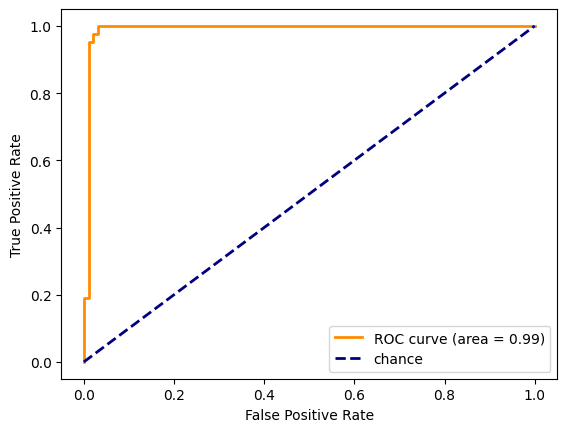

In [27]:
lst_models_for_ensemble = []
model_accuracies = []  # Lista para armazenar as acurácias dos modelos
model_names = []

# Adicione os três melhores modelos
for i, model in enumerate(lst_best_models):
      lst_models_for_ensemble.append((model['name']+'/'+str(i), model['model']))
      print(i)

ens_clf = VotingClassifier(estimators=lst_models_for_ensemble, voting='soft')
ens_clf.fit(X, y)

print(ens_clf)

print (ens_clf.predict(X[:20]))

# Lista para armazenar as curvas ROC e AUCs
fpr_list, tpr_list, auc_list = [], [], []

# separar em X_train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=rng)

y_true = y_test

# Acesso à lista de estimadores
estimadores = ens_clf.estimators_

# Exibição dos estimadores
print("Estimadores no VotingClassifier:")
for idx, estimador in enumerate(estimadores):
    print(f"Estimador {idx + 1}: {estimador}")

# Cria um ensemble para o modelo atual
ens_clf.fit(X_train, y_train)

y_score = ens_clf.predict_proba(X_test)[:, 1]

# Cálculo da curva ROC
fpr, tpr, thresholds = roc_curve(y_true, y_score)

auc_ = roc_auc_score(y_true, y_score)

plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(auc_))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


## Conclusão

No presente estudo, foi conduzida uma análise abrangente utilizando um modelo que incorpora todas as features disponíveis pelo dataset para a identificação de câncer de mama benigno e maligno. Diversos algoritmos, incluindo RandomForestClassifier, SVC, LogisticRegression e CatBoost Classifier, foram aplicados em uma competição utilizando a técnica de nested cross-validation.

Os resultados obtidos foram promissores, com uma Curva ROC exibindo uma AUC de 0.99. A acurácia do modelo também atingiu um patamar significativamente alto. Esses indicadores refletem um desempenho robusto do modelo, indicando sua capacidade de distinguir eficazmente entre as classes de câncer de mama.

--------------------------------------------------------------------------------------

###Dataset com menos features

In [28]:
column_names_2 = ['Sample code number',
                'Clump Thickness',
                'Uniformity of Cell Size',
                'Uniformity of Cell Shape',
                'Marginal Adhesion',
                'Single Epithelial Cell Size',
                'Bare Nuclei',
                'Bland Chromatin',
                'Normal Nucleoli',
                'Mitoses',
                'Class',
]

In [29]:
df_2 = pd.read_csv(file_, header=None, names=column_names_2)
df_2

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [30]:
df_2.replace('?', np.nan, inplace =True) #Trocando as variaveis faltantes por Nans
df_2

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [31]:
df_2['Class_bin'] = (df_2['Class'] == 4).values.astype('int') #modificando 4 (maligno) e 2(benigno) em binario
df_2

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class,Class_bin
0,1000025,5,1,1,1,2,1,3,1,1,2,0
1,1002945,5,4,4,5,7,10,3,2,1,2,0
2,1015425,3,1,1,1,2,2,3,1,1,2,0
3,1016277,6,8,8,1,3,4,3,7,1,2,0
4,1017023,4,1,1,3,2,1,3,1,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2,0
695,841769,2,1,1,1,2,1,1,1,1,2,0
696,888820,5,10,10,3,7,3,8,10,2,4,1
697,897471,4,8,6,4,3,4,10,6,1,4,1


In [32]:
df_2=df_2.dropna() #filtra os dados faltantes, retirando as linhas com esses dados
df_2

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class,Class_bin
0,1000025,5,1,1,1,2,1,3,1,1,2,0
1,1002945,5,4,4,5,7,10,3,2,1,2,0
2,1015425,3,1,1,1,2,2,3,1,1,2,0
3,1016277,6,8,8,1,3,4,3,7,1,2,0
4,1017023,4,1,1,3,2,1,3,1,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2,0
695,841769,2,1,1,1,2,1,1,1,1,2,0
696,888820,5,10,10,3,7,3,8,10,2,4,1
697,897471,4,8,6,4,3,4,10,6,1,4,1


Diminuindo as freatures

In [34]:
df_2.drop(['Sample code number',
           'Uniformity of Cell Shape',
            'Clump Thickness',
            'Bare Nuclei',
            'Normal Nucleoli',
            'Mitoses',
           'Bland Chromatin',
           'Class',
           ], axis=1,inplace=True)
df_2

<ipython-input-34-371d003fde17>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2.drop(['Sample code number',


,Uniformity of Cell Size,Marginal Adhesion,Single Epithelial Cell Size,Class_bin
0,1,1,2,0
1,4,5,7,0
2,1,1,2,0
3,8,1,3,0
4,1,3,2,0
...,...,...,...,...
694,1,1,3,0
695,1,1,2,0
696,10,3,7,1
697,8,4,3,1


In [35]:
df_2=df_2.dropna() #filtra os dados faltantes, retirando as linhas com esses dados
df_2

,Uniformity of Cell Size,Marginal Adhesion,Single Epithelial Cell Size,Class_bin
0,1,1,2,0
1,4,5,7,0
2,1,1,2,0
3,8,1,3,0
4,1,3,2,0
...,...,...,...,...
694,1,1,3,0
695,1,1,2,0
696,10,3,7,1
697,8,4,3,1


In [36]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Uniformity of Cell Size      683 non-null    int64
 1   Marginal Adhesion            683 non-null    int64
 2   Single Epithelial Cell Size  683 non-null    int64
 3   Class_bin                    683 non-null    int64
dtypes: int64(4)
memory usage: 26.7 KB


###Correlação

In [45]:
df_2.corr()

,Uniformity of Cell Size,Marginal Adhesion,Single Epithelial Cell Size,Class_bin
Uniformity of Cell Size,1.000000,0.706977,0.753544,0.820801
Marginal Adhesion,0.706977,1.000000,0.594548,0.706294
Single Epithelial Cell Size,0.753544,0.594548,1.000000,0.690958
Class_bin,0.820801,0.706294,0.690958,1.000000


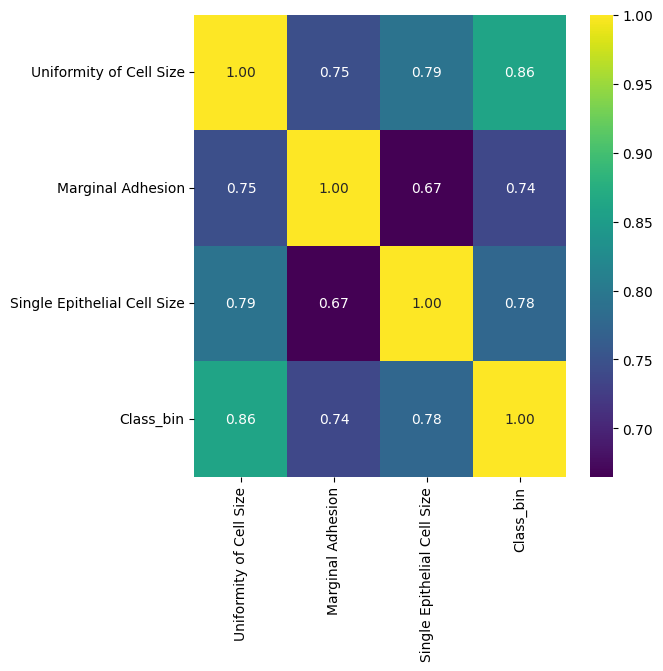

In [37]:
fig, (ax1) = plt.subplots(1, figsize=(6,6))
sns.heatmap(df_2.corr(method='spearman'), annot=True, fmt='.2f', cmap="viridis", linecolor="#222", ax=ax1)
plt.show()

In [38]:
display(df_2)

,Uniformity of Cell Size,Marginal Adhesion,Single Epithelial Cell Size,Class_bin
0,1,1,2,0
1,4,5,7,0
2,1,1,2,0
3,8,1,3,0
4,1,3,2,0
...,...,...,...,...
694,1,1,3,0
695,1,1,2,0
696,10,3,7,1
697,8,4,3,1


### Partial Dependence Plot

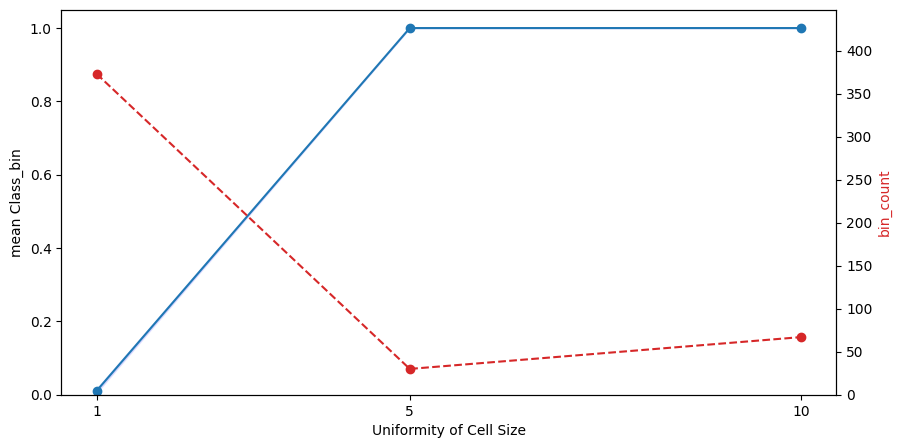

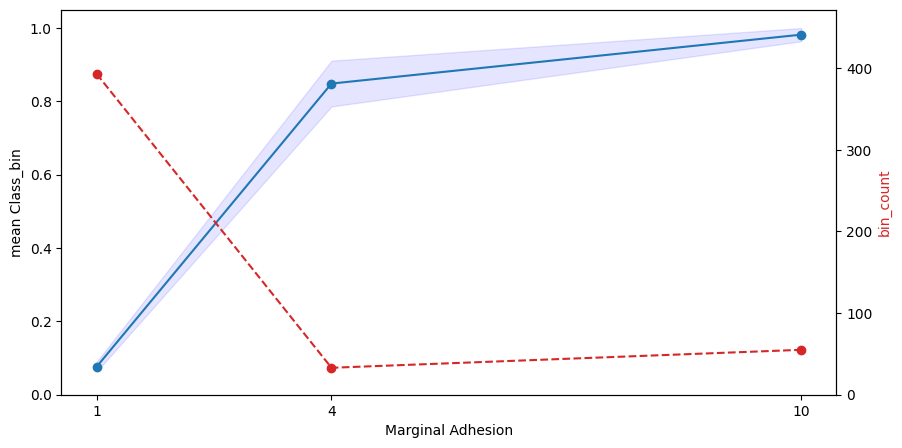

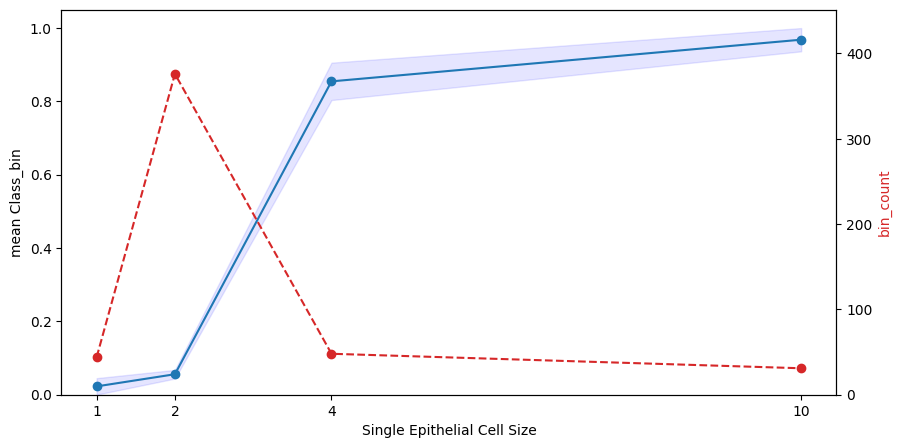

In [39]:
pdp(df_2,
    df_2.columns,
    'Class_bin',
    n=4, #aumenta a quantidade de faixas verticais que serão analisadas. Integra menos pontos para achar a média
    writefolder=None,
    digits=1,
    figsize=(10, 5),
    showbincount=True,
    ylim_origin=True,
    )

In [40]:
X = df_2.drop(['Class_bin'], axis = 1)
y = df_2['Class_bin']

### Validação e Treinamento

In [41]:
# Dividir entre treino e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=rng)

In [42]:
# treinar um modelo simples com os dados de treino
clf = LogisticRegression(random_state=rng).fit(X_train, y_train)

# estabelecer o y_predict
y_pred = clf.predict(X_test)
y_score = clf.predict_proba(X_test)[:, 1] # o 1 é porque estamos vendo o escore para a predição do label 1
y_true = y_test

auc_ = roc_auc_score(y_true, y_score)

print (f'AUC score: {auc_:.2f}')

AUC score: 0.99


Nested cross-validation

In [43]:
cv_outer = 3 # controla quantos 'melhores modelos' teremos
cv_inner = 5 # particoes da cross-validação interna que seleciona o melhor modelo em 1 split do cv_outer

l = list()

# registrar random forest
l.append(dict())
l[-1]['model'] = RandomForestClassifier(max_depth=2)
l[-1]['name'] = 'Random Forest Classifier max_depth=2'
l[-1]['scores'] = list()

l.append(dict())
l[-1]['model'] = RandomForestClassifier(max_depth=3)
l[-1]['name'] = 'Random Forest Classifier max_depth=3'
l[-1]['scores'] = list()

l.append(dict())
l[-1]['model'] = RandomForestClassifier(max_depth=4)
l[-1]['name'] = 'Random Forest Classifier max_depth=4'
l[-1]['scores'] = list()

l.append(dict())
l[-1]['model'] = RandomForestClassifier(max_depth=6)
l[-1]['name'] = 'Random Forest Classifier max_depth=6'
l[-1]['scores'] = list()

l.append(dict())
l[-1]['model'] = RandomForestClassifier(max_depth=8)
l[-1]['name'] = 'Random Forest Classifier max_depth=8'
l[-1]['scores'] = list()

l.append(dict())
l[-1]['model'] = RandomForestClassifier(max_depth=None)
l[-1]['name'] = 'Random Forest Classifier, max_depth=None'
l[-1]['scores'] = list()

# colocar o catboost
l.append(dict())
l[-1]['model'] = CatBoostClassifier(logging_level='Silent')
l[-1]['name'] = 'CatBoost Classifier'
l[-1]['scores'] = list()


# registrar alguns logits
n_logits = 16
C_vector_for_logit = np.linspace(0.1, 5, n_logits)

for i, C in enumerate(C_vector_for_logit):
    l.append(dict())
    l[-1]['model'] = LogisticRegression(C=C)
    l[-1]['name'] = f'Logistic Regression C={C:.2f}'
    l[-1]['scores'] = list()


# registrar SVCs
#C_vector_for_svc = np.linspace(0.1, 5, 12)
C_vector_for_svc = np.logspace(-2, 2, 20)
#gamma_vector_for_svc = np.linspace(0.1, 5, 12)
gamma_vector_for_svc = np.logspace(-2, 2, 20)


for C, gamma in product(C_vector_for_svc, gamma_vector_for_svc):
    l.append(dict())
    l[-1]['model'] = SVC(C=C, gamma=gamma,probability=True)
    l[-1]['name'] = f'SVC C={C:.2f} gamma={gamma:.2f}'
    l[-1]['scores'] = list()


print (f'Lista de modelos com tamanho final igual a {len(l)}.')


lst_best_models = list()
scaler = StandardScaler()

# esse laço outer eh novo, entrou no lugar do train_test_split
kfold_outer = StratifiedKFold(n_splits=cv_outer, shuffle=True)
for j, (train_index_outer, test_index_outer) in enumerate(kfold_outer.split(X, y)):

    print (f'Outer Fold {j+1} de um total de {cv_outer}...')

    X_ = X.iloc[train_index_outer]
    y_ = y.iloc[train_index_outer]

    X_holdout = X.iloc[test_index_outer]
    y_holdout = y.iloc[test_index_outer]



    kfold_inner = StratifiedKFold(n_splits=cv_inner, shuffle=True)
    for i, (train_index_inner, test_index_inner) in enumerate(kfold_inner.split(X_, y_)):

        X_train = X_.iloc[train_index_inner].copy() #
        y_train = y_.iloc[train_index_inner]

        X_test = X_.iloc[test_index_inner].copy()
        y_test = y_.iloc[test_index_inner]


        # como exemplo de modificação no X vamos aplicar o
        scaler.fit(X_train)
        X_train  = scaler.transform(X_train)
        X_test  = scaler.transform(X_test)


        # varrer os modelos, o principal problema dessa rotina é que ela faz tudo em série, tem que usar o multiprocessing pra rodar em paralelo
        for model in l:
            clf = model['model']

            clf.fit(X_train, y_train)

            y_true = y_test
            y_pred = clf.predict(X_test)

            acc_ = accuracy_score(y_true, y_pred)
            model['scores'].append(acc_)

            #print (f"Modelo {model['name']} teve score {acc_:.3f}")


    # aqui eu preciso pegar uma media dos scores de cada modelo, media nos folds
    lst_medias_scores = list()
    for model in l:
        media_score = np.mean(model['scores'])
        lst_medias_scores.append(media_score)
        print (f'Media score modelo {model["name"]} igual a {media_score:.3f}')



    name_best_model = l[np.argmax(lst_medias_scores)]["name"]
    id_best_model = np.argmax(lst_medias_scores)
    lst_best_models.append(l[np.argmax(lst_medias_scores)]) # guardar os melhores numa lista

    print (f'A melhor média de escore foi {np.max(lst_medias_scores):.3f} do modelo {name_best_model} no indice {id_best_model}')

    clf = l[np.argmax(lst_medias_scores)]['model']
    #

    #
    # std scaler novamente pois vou precisar aplicar no holdout
    scaler.fit(X_)
    X_scaled  = scaler.transform(X_)
    X_holdout_scaled  = scaler.transform(X_holdout)

    clf.fit(X_scaled, y_)
    y_true = y_holdout
    y_pred = clf.predict(X_holdout_scaled)

    print(f'Acurácia do modelo {name_best_model} no holdout test: {accuracy_score(y_true, y_pred):.3f}')

print ()
print ('Melhores modelos:')
for model in lst_best_models:
    print (f'{model["name"]}')

best_accuracies = []

# Iteração sobre os melhores modelos
for model_info in lst_best_models:
    model = model_info['model']
    model_name = model_info['name']

    # Lista para armazenar as acurácias para este modelo
    model_accuracies = []

    # Iteração sobre as divisões externas
    for j, (train_index_outer, test_index_outer) in enumerate(kfold_outer.split(X, y)):
        X_ = X.iloc[train_index_outer]
        y_ = y.iloc[train_index_outer]

        X_holdout = X.iloc[test_index_outer]
        y_holdout = y.iloc[test_index_outer]

        # Iteração sobre as divisões internas
        for i, (train_index_inner, test_index_inner) in enumerate(kfold_inner.split(X_, y_)):
            X_train = X_.iloc[train_index_inner].copy()
            y_train = y_.iloc[train_index_inner]

            X_test = X_.iloc[test_index_inner].copy()
            y_test = y_.iloc[test_index_inner]

            # Escalonamento
            scaler.fit(X_train)
            X_train = scaler.transform(X_train)
            X_test = scaler.transform(X_test)

            # Treinamento do modelo
            model.fit(X_train, y_train)

            # Avaliação do modelo
            y_true = y_test
            y_pred = model.predict(X_test)

            # Cálculo da acurácia e armazenamento
            acc_ = accuracy_score(y_true, y_pred)
            model_accuracies.append(acc_)

    # Acurácia média para este modelo
    avg_accuracy = np.mean(model_accuracies)
    print(f'Acurácia média do modelo {model_name}: {avg_accuracy:.3f}')
    best_accuracies.append((model_name, avg_accuracy))

# Exibição das acurácias dos melhores modelos
print('\nAcurácias dos melhores modelos:')
for model_name, accuracy in best_accuracies:
    print(f'{model_name}: {accuracy:.3f}')

Lista de modelos com tamanho final igual a 423.
Outer Fold 1 de um total de 3...
Media score modelo Random Forest Classifier max_depth=2 igual a 0.949
Media score modelo Random Forest Classifier max_depth=3 igual a 0.954
Media score modelo Random Forest Classifier max_depth=4 igual a 0.956
Media score modelo Random Forest Classifier max_depth=6 igual a 0.943
Media score modelo Random Forest Classifier max_depth=8 igual a 0.952
Media score modelo Random Forest Classifier, max_depth=None igual a 0.949
Media score modelo CatBoost Classifier igual a 0.947
Media score modelo Logistic Regression C=0.10 igual a 0.943
Media score modelo Logistic Regression C=0.43 igual a 0.945
Media score modelo Logistic Regression C=0.75 igual a 0.949
Media score modelo Logistic Regression C=1.08 igual a 0.949
Media score modelo Logistic Regression C=1.41 igual a 0.949
Media score modelo Logistic Regression C=1.73 igual a 0.949
Media score modelo Logistic Regression C=2.06 igual a 0.949
Media score modelo Log

##Roc Curve

0
1
2
VotingClassifier(estimators=[('Random Forest Classifier max_depth=4/0',
                              RandomForestClassifier(max_depth=4)),
                             ('Random Forest Classifier max_depth=4/1',
                              RandomForestClassifier(max_depth=4)),
                             ('Random Forest Classifier max_depth=4/2',
                              RandomForestClassifier(max_depth=4))],
                 voting='soft')
[0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0]
Estimadores no VotingClassifier:
Estimador 1: RandomForestClassifier(max_depth=4)
Estimador 2: RandomForestClassifier(max_depth=4)
Estimador 3: RandomForestClassifier(max_depth=4)


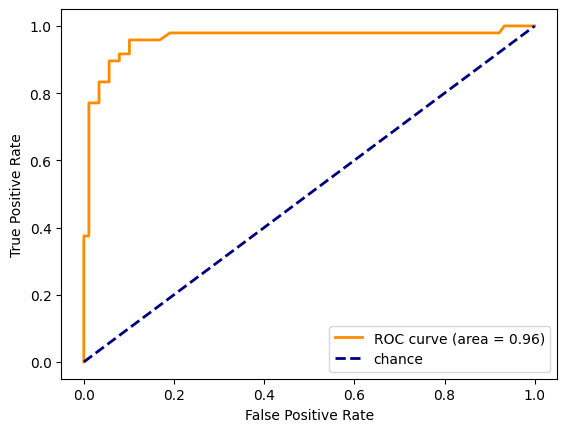

In [44]:
lst_models_for_ensemble = []
model_accuracies = []  # Lista para armazenar as acurácias dos modelos
model_names = []

# Adicione os três melhores modelos
for i, model in enumerate(lst_best_models):
      lst_models_for_ensemble.append((model['name']+'/'+str(i), model['model']))
      print(i)

ens_clf = VotingClassifier(estimators=lst_models_for_ensemble, voting='soft')
ens_clf.fit(X, y)

print(ens_clf)

print (ens_clf.predict(X[:20]))

# Lista para armazenar as curvas ROC e AUCs
fpr_list, tpr_list, auc_list = [], [], []

# separar em X_train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=rng)

y_true = y_test

# Acesso à lista de estimadores
estimadores = ens_clf.estimators_

# Exibição dos estimadores
print("Estimadores no VotingClassifier:")
for idx, estimador in enumerate(estimadores):
    print(f"Estimador {idx + 1}: {estimador}")

# Cria um ensemble para o modelo atual
ens_clf.fit(X_train, y_train)

y_score = ens_clf.predict_proba(X_test)[:, 1]

# Cálculo da curva ROC
fpr, tpr, thresholds = roc_curve(y_true, y_score)

auc_ = roc_auc_score(y_true, y_score)

plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(auc_))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


Ao reduzir o conjunto de features no modelo para uma seleção mais específica, incluindo apenas aquelas consideradas mais relevantes, observou-se uma notável vantagem em relação à Curva ROC, atingindo uma pontuação de 0.96.

Essa vantagem decorre da seleção de features, permitindo que o modelo se concentre nas variáveis mais informativas e impactantes para a classificação, reduzindo a complexidade e, consequentemente, melhorando o desempenho preditivo. Além disso, ao diminuir o número de features, o modelo se torna mais eficiente computacionalmente, requer menos dados para treinamento e é menos propenso a overfitting, o que pode resultar em um modelo mais robusto e generalizável.

A otimização da seleção de features é um processo crucial no desenvolvimento de modelos de aprendizado de máquina. Encontrar o equilíbrio certo entre informatividade e simplicidade é fundamental para alcançar um modelo eficaz e de alto desempenho.

## Conclusão

Durante este estudo, foram exploradas e comparadas duas abordagens de modelagem para a identificação de câncer de mama, cada uma com uma seleção diferente de features. A primeira estratégia utilizou todas as features disponíveis, resultando em uma Curva ROC com uma notável Área Sob a Curva (AUC) de 0.99. Esta alta pontuação indica um modelo altamente eficaz e discriminativo na distinção entre câncer de mama benigno e maligno.

Posteriormente, uma segunda estratégia foi implementada, selecionando cuidadosamente um subconjunto específico de features. Este modelo simplificado manteve uma AUC impressionante de 0.96, evidenciando a robustez e a capacidade de generalização mesmo com menos features.

Em resumo, a escolha das features desempenha um papel fundamental na construção de modelos de aprendizado de máquina eficazes para a identificação de câncer de mama. Essa pesquisa demonstra que, ao equilibrar a informatividade com a simplicidade, é possível alcançar modelos altamente discriminativos que podem ser aplicados com sucesso na prática clínica.






